<center><h1> Diwali Sales Analysis 🪔</h1></center>

<center><h1> Data Preprocessing: </h1></center>

In [3]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [4]:
# import csv file
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [5]:
df.shape

(11251, 15)

In [6]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [9]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
# drop null values
df.dropna(inplace=True)

In [11]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [12]:
df['Amount'].dtypes

dtype('int32')

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
#rename column
df.rename(columns= {'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [15]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [16]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


<center><h1> Data Visualization: </h1></center>

### Gender

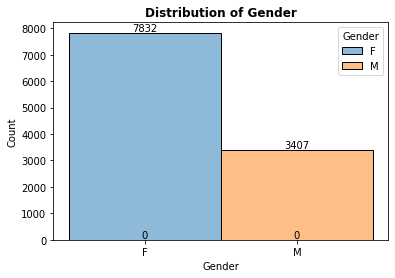

In [17]:
# plotting a bar chart for Gender and its count
ax = sns.histplot(x='Gender', data=df, hue='Gender')
ax.set_title('Distribution of Gender', fontweight="bold", fontsize="large")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


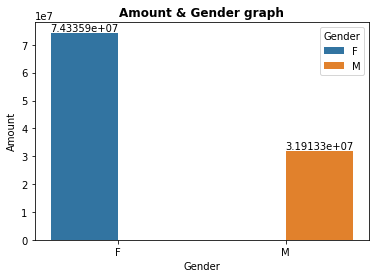

In [18]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.title('Amount & Gender graph', fontweight='bold', fontsize="large")
ax = sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen, hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

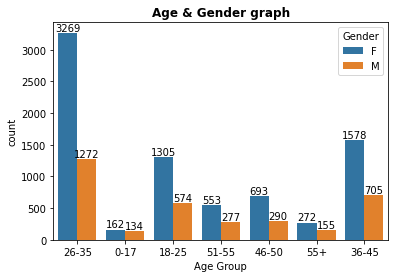

In [19]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
plt.title('Age & Gender graph', fontweight='bold', fontsize="large")
for bars in ax.containers:
    ax.bar_label(bars)

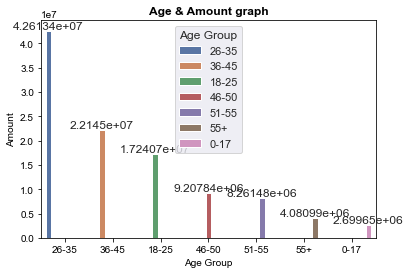

In [20]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.title('Age & Amount graph', fontweight='bold', fontsize="large")
sns.set(rc={'figure.figsize':(14,3)})
ax = sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age, hue = 'Age Group')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

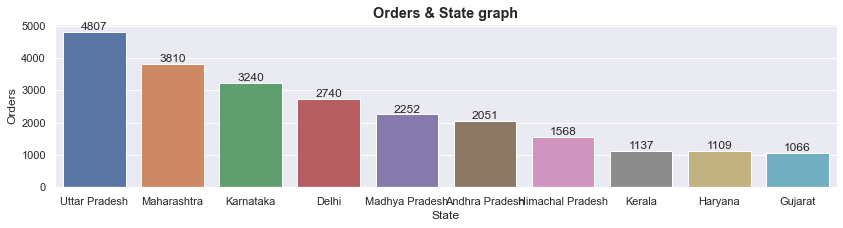

In [21]:
# total number of orders from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
plt.title('Orders & State graph', fontweight='bold', fontsize="large")
sns.set(rc={'figure.figsize':(18,5)})
ax = sns.barplot(data = sales_state, x = 'State',y= 'Orders')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

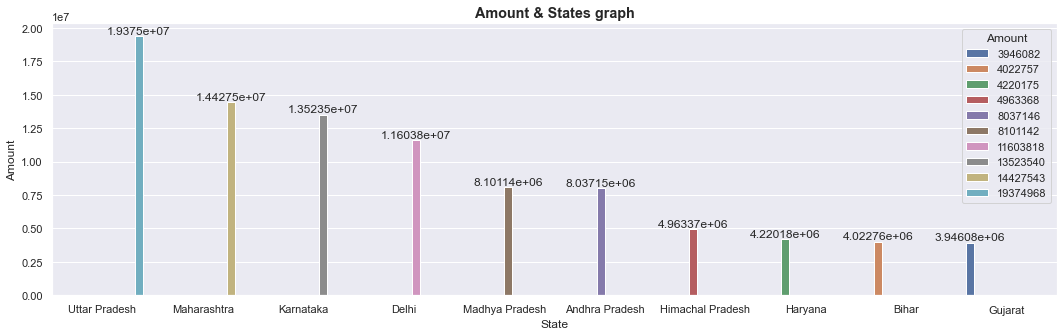

In [22]:
# total amount/sales from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.title('Amount & States graph', fontweight='bold', fontsize="large")
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(data = sales_state, x = 'State',y= 'Amount', hue = 'Amount')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

In [23]:
married_gender_count = df.groupby(['Marital_Status', 'Gender']).size().reset_index(name='Count')
total_married_gender_count = married_gender_count['Count'].sum()
print(total_married_gender_count)

11239


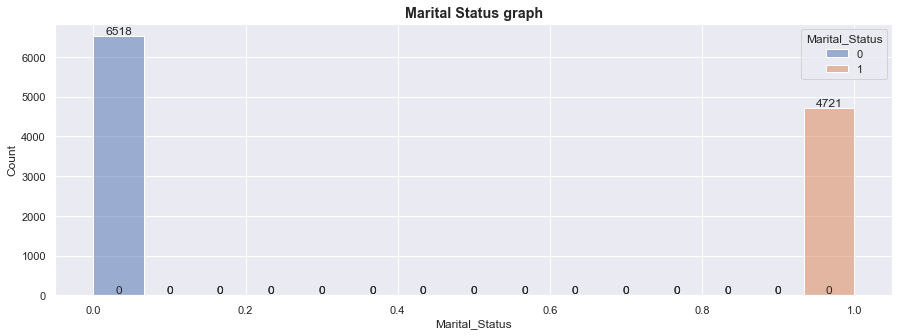

In [24]:
ax = sns.histplot(data = df, x = 'Marital_Status', hue = 'Marital_Status')
plt.title('Marital Status graph', fontweight='bold', fontsize="large")
# sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

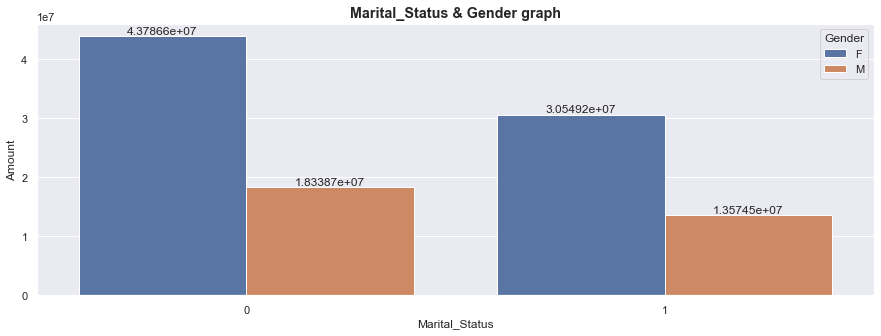

In [25]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.title("Marital_Status & Gender graph", fontweight='bold', fontsize="large")
sns.set(rc={'figure.figsize':(6,5)})
ax = sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

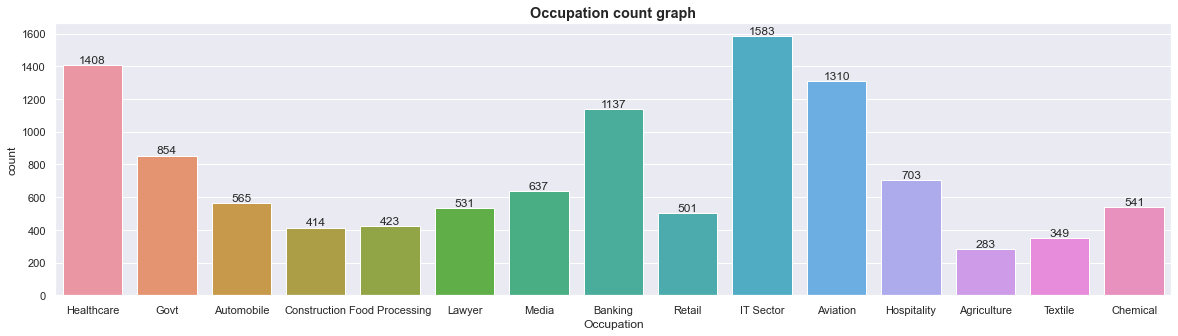

In [26]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')
plt.title("Occupation count graph", fontweight='bold', fontsize="large")
for bars in ax.containers:
    ax.bar_label(bars)

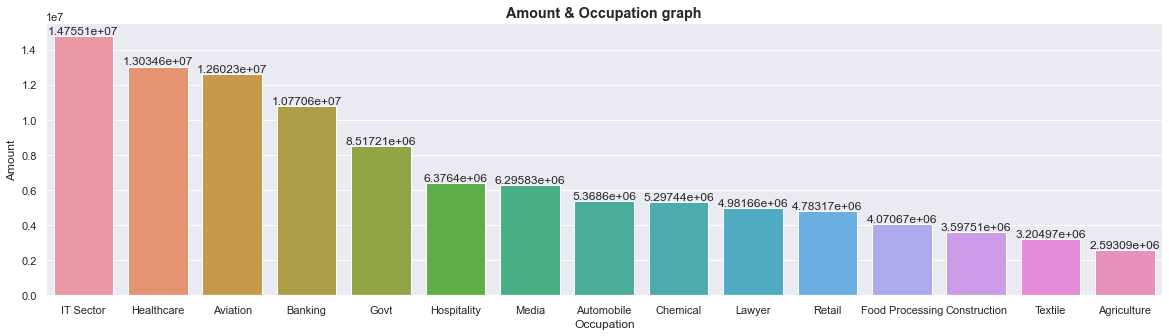

In [27]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.title("Amount & Occupation graph", fontweight='bold', fontsize="large")
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

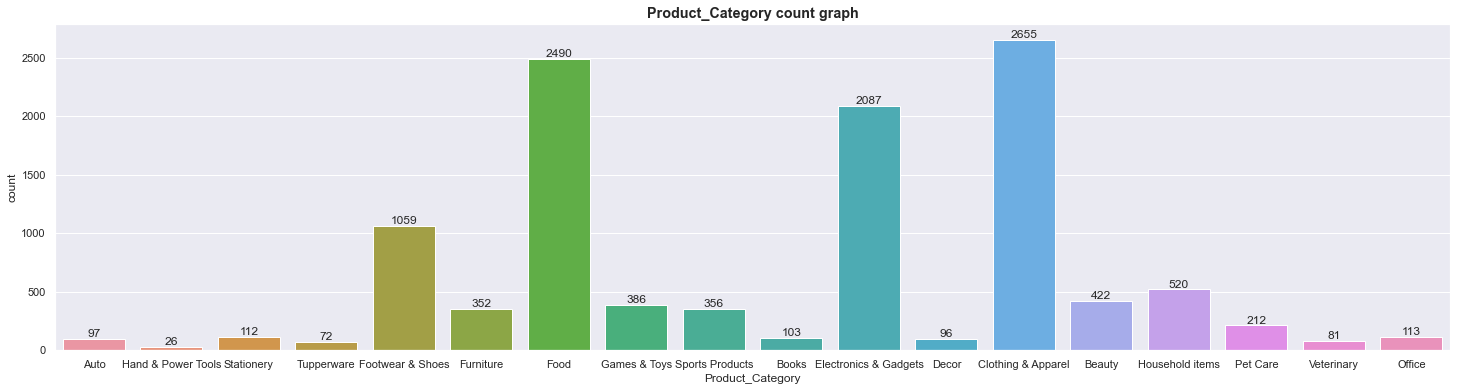

In [28]:
sns.set(rc={'figure.figsize':(25,6)})
ax = sns.countplot(data = df, x = 'Product_Category')
plt.title("Product_Category count graph", fontweight='bold', fontsize="large")
for bars in ax.containers:
    ax.bar_label(bars)

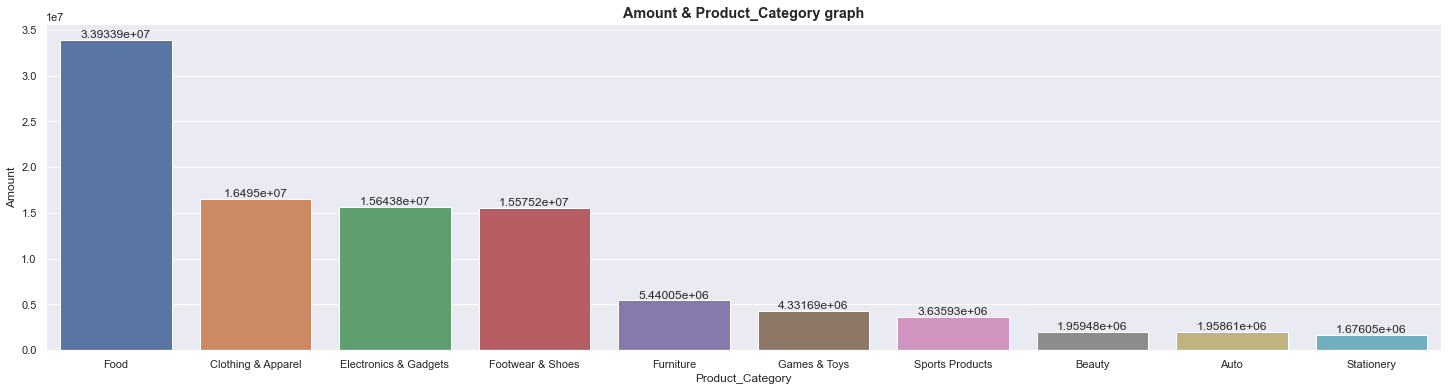

In [29]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.title("Amount & Product_Category graph",fontweight='bold', fontsize="large")
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

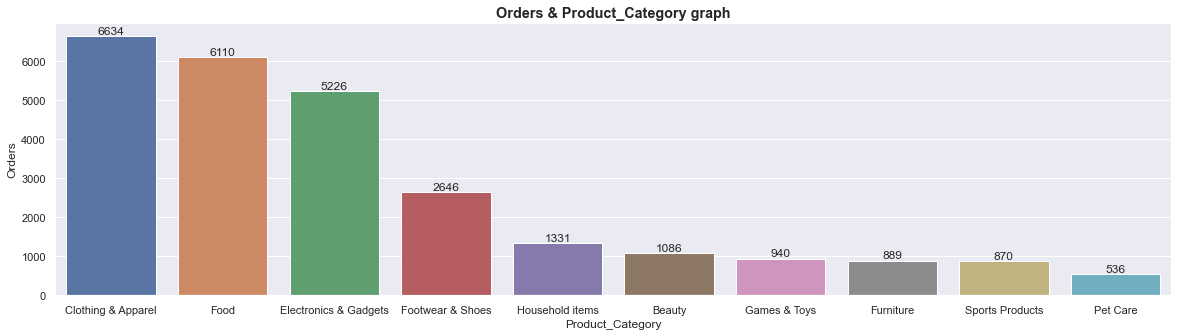

In [30]:
# top 10 most sold products (same thing as above)
sales_state = df.groupby(['Product_Category'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
plt.title("Orders & Product_Category graph",fontweight='bold', fontsize="large")
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.barplot(data = sales_state, x = 'Product_Category',y= 'Orders')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

<center><h1> Web Display: </h1></center>

In [1]:
import webbrowser

url = "http://127.0.0.1:5500/Diwali%20Sales%20Prediction/web/"
webbrowser.open(url)


True

<center><h1> Conclusion: </h1></center>


<center>
<table>
<tr>
<th>
<center><h2>Analysis</h2></center>
</th>
<th>
<center><h2>Most</h2></center>
</th>
</tr>
<tr>
<td>
<center><h2>Mostly Buyers</h2></center>
</td>
<td>
<center><h2>Age:26-35, Gender:Female, Married</h2></center>
</td>
</tr>
<tr>
<td>
<center><h2>State</h2></center>
</td>
<td>
<center><h2>UP, Maharastra, Karnataka</h2></center>
</td>
</tr>
<tr>
<td>
<center><h2>Working</h2></center>
</td>
<td>
<center><h2>IT, Healthcare, Aviation</h2></center>
</td>
</tr>
<tr>
<td>
<center><h2>Product category</h2></center>
</td>
<td>
<center><h2>Food, Clothing, Electronics</h2></center>
</td>
</tr>
</table>
</center>

In [40]:
gender_count = df['Gender'].value_counts()
print("Total number of males:", gender_count['M'])
print("Total number of females:", gender_count['F'])


Total number of males: 3407
Total number of females: 7832


Married Female of 26-35 count is: 3269
Sales count in Uttar Pradesh: 1944
Sales count in Maharashtra: 1525
Sales count in Karnataka: 1304
Working In IT: 1583
Working in Healthcare: 1408
Working in Aviation: 1310
Count of Product_Category - Food: 2490
Count of Product_Category - Clothing & Apparel: 2655
Count of Product_Category - Electronics & Gadgets: 2087


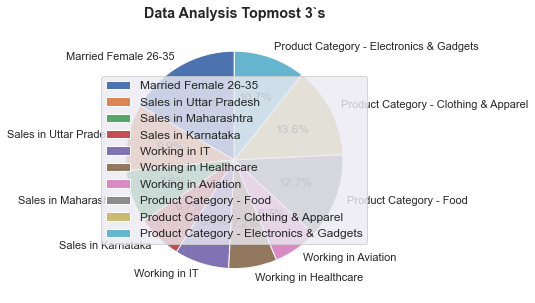

In [33]:
female_count = df[(df['Gender'] == 'F') & (df['Age Group'] == '26-35')].shape[0]
print("Married Female of 26-35 count is:",female_count)

sales_up = df[df['State'] == 'Uttar Pradesh'].shape[0]
sales_mh = df[df['State'] == 'Maharashtra'].shape[0]
sales_ka = df[df['State'] == 'Karnataka'].shape[0]
print("Sales count in Uttar Pradesh:", sales_up)
print("Sales count in Maharashtra:", sales_mh)
print("Sales count in Karnataka:", sales_ka)

top_3_occupations = df['Occupation'].value_counts().head(3).index.tolist()
amount_count_occupation1 = df[df['Occupation'] == top_3_occupations[0]]['Amount'].count()
amount_count_occupation2 = df[df['Occupation'] == top_3_occupations[1]]['Amount'].count()
amount_count_occupation3 = df[df['Occupation'] == top_3_occupations[2]]['Amount'].count()
print("Working In IT:", amount_count_occupation1)
print("Working in Healthcare:", amount_count_occupation2)
print("Working in Aviation:", amount_count_occupation3)

food_count = df[df['Product_Category'] == 'Food'].shape[0]
clothing_count = df[df['Product_Category'] == 'Clothing & Apparel'].shape[0]
electronics_count = df[df['Product_Category'] == 'Electronics & Gadgets'].shape[0]
print("Count of Product_Category - Food:", food_count)
print("Count of Product_Category - Clothing & Apparel:", clothing_count)
print("Count of Product_Category - Electronics & Gadgets:", electronics_count)



# Data for chart
labels = ['Married Female 26-35', 'Sales in Uttar Pradesh', 'Sales in Maharashtra', 'Sales in Karnataka', 'Working in IT', 'Working in Healthcare', 'Working in Aviation', 'Product Category - Food', 'Product Category - Clothing & Apparel', 'Product Category - Electronics & Gadgets']
sizes = [female_count, sales_up, sales_mh, sales_ka, amount_count_occupation1, amount_count_occupation2, amount_count_occupation3, food_count, clothing_count, electronics_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Data Analysis Topmost 3`s',fontweight='bold' , fontsize="large")
sns.set(rc={'figure.figsize':(30,13)})
plt.legend(labels, loc="center", fontsize='medium')
plt.show()



    
Project link GitHub : https://0gaurav4.github.io/final-year23/Diwali%20Sales%20Prediction/web/index.html

Thank you!